In [101]:
import requests
import pandas as pd
import numpy as np
from pitch_plot import drawpitch
import matplotlib.pyplot as plt

In [102]:
# read in data

folder_a = "43"
folder_b = "106"

match_info_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/{}/{}.json".format(folder_a,folder_b)

games = requests.get(url=match_info_url).json()
gamedf = pd.DataFrame(games)

match_data_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/three-sixty/{}.json"

gameid = "3869685"

match_events_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{}.json"

match_events = requests.get(url=match_events_url.format(gameid)).json()
match_events_df = pd.DataFrame(match_events)

In [103]:
match_events_df.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,duel,interception,dribble,shot,goalkeeper,ball_recovery,foul_committed,substitution,50_50,bad_behaviour
0,0584ee21-e3dd-4d9f-95a0-5b5e84be25c3,1,1,00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 779, 'name': 'Argentina'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b32679f8-942e-4122-96a2-015caf75e628,2,1,00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 779, 'name': 'Argentina'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,954f6855-de22-46a2-8d09-6fe94eec2b9b,3,1,00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 779, 'name': 'Argentina'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6404a8e8-afaf-489d-b65e-173a237ffed5,4,1,00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 779, 'name': 'Argentina'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f651a6c4-55e3-4e0f-a178-59414ba83d6a,5,1,00:00:00.578,0,0,"{'id': 30, 'name': 'Pass'}",2,"{'id': 771, 'name': 'France'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
cols_to_use = ['index',
               'player',
               'type',
               'location',
               'pass']

events = match_events_df.copy()[cols_to_use]

events

,index,player,type,location,pass
0,1,NaN,"{'id': 35, 'name': 'Starting XI'}",NaN,NaN
1,2,NaN,"{'id': 35, 'name': 'Starting XI'}",NaN,NaN
2,3,NaN,"{'id': 18, 'name': 'Half Start'}",NaN,NaN
3,4,NaN,"{'id': 18, 'name': 'Half Start'}",NaN,NaN
4,5,"{'id': 5487, 'name': 'Antoine Griezmann'}","{'id': 30, 'name': 'Pass'}","[61.0, 40.1]","{'recipient': {'id': 10481, 'name': 'Aurélien ..."
...,...,...,...,...,...
4402,4403,"{'id': 6909, 'name': 'Damián Emiliano Martínez'}","{'id': 23, 'name': 'Goal Keeper'}","[1.0, 40.0]",NaN
4403,4404,"{'id': 28263, 'name': 'Gonzalo Ariel Montiel'}","{'id': 16, 'name': 'Shot'}","[108.1, 40.1]",NaN
4404,4405,"{'id': 3099, 'name': 'Hugo Lloris'}","{'id': 23, 'name': 'Goal Keeper'}","[1.0, 40.0]",NaN
4405,4406,NaN,"{'id': 34, 'name': 'Half End'}",NaN,NaN


In [105]:
for col in ['type','pass']:
    
    events = pd.concat([events, pd.json_normalize(events[col])], axis=1, join='inner')
    
events

,index,player,type,location,pass,id,name,length,angle,end_location,...,cross,through_ball,technique.id,technique.name,aerial_won,assisted_shot_id,shot_assist,inswinging,goal_assist,outswinging
0,1,NaN,"{'id': 35, 'name': 'Starting XI'}",NaN,NaN,35,Starting XI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,"{'id': 35, 'name': 'Starting XI'}",NaN,NaN,35,Starting XI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,"{'id': 18, 'name': 'Half Start'}",NaN,NaN,18,Half Start,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,"{'id': 18, 'name': 'Half Start'}",NaN,NaN,18,Half Start,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"{'id': 5487, 'name': 'Antoine Griezmann'}","{'id': 30, 'name': 'Pass'}","[61.0, 40.1]","{'recipient': {'id': 10481, 'name': 'Aurélien ...",30,Pass,13.364505,2.907503,"[48.0, 43.2]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,4403,"{'id': 6909, 'name': 'Damián Emiliano Martínez'}","{'id': 23, 'name': 'Goal Keeper'}","[1.0, 40.0]",NaN,23,Goal Keeper,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4403,4404,"{'id': 28263, 'name': 'Gonzalo Ariel Montiel'}","{'id': 16, 'name': 'Shot'}","[108.1, 40.1]",NaN,16,Shot,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4404,4405,"{'id': 3099, 'name': 'Hugo Lloris'}","{'id': 23, 'name': 'Goal Keeper'}","[1.0, 40.0]",NaN,23,Goal Keeper,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4405,4406,NaN,"{'id': 34, 'name': 'Half End'}",NaN,NaN,34,Half End,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
list(events)

['index',
 'player',
 'type',
 'location',
 'pass',
 'id',
 'name',
 'length',
 'angle',
 'end_location',
 'recipient.id',
 'recipient.name',
 'height.id',
 'height.name',
 'type.id',
 'type.name',
 'body_part.id',
 'body_part.name',
 'switch',
 'outcome.id',
 'outcome.name',
 'deflected',
 'cross',
 'through_ball',
 'technique.id',
 'technique.name',
 'aerial_won',
 'assisted_shot_id',
 'shot_assist',
 'inswinging',
 'goal_assist',
 'outswinging']

In [107]:
pass_events = events[events["name"] == "Pass"]

In [108]:
for col in ['location','end_location']:
    pass_events[[f'{col}_x',f'{col}_y']] = pd.DataFrame(pass_events[col].to_list(), columns=[f'{col}_x',f'{col}_y'])

C:\Users\georg\AppData\Local\Temp\ipykernel_9224\2817543581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_events[[f'{col}_x',f'{col}_y']] = pd.DataFrame(pass_events[col].to_list(), columns=[f'{col}_x',f'{col}_y'])
C:\Users\georg\AppData\Local\Temp\ipykernel_9224\2817543581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_events[[f'{col}_x',f'{col}_y']] = pd.DataFrame(pass_events[col].to_list(), columns=[f'{col}_x',f'{col}_y'])
C:\Users\georg\AppData\Local\Temp\ipykernel_9224\2817543581.py

In [109]:
pass_events

,index,player,type,location,pass,id,name,length,angle,end_location,...,aerial_won,assisted_shot_id,shot_assist,inswinging,goal_assist,outswinging,location_x,location_y,end_location_x,end_location_y
4,5,"{'id': 5487, 'name': 'Antoine Griezmann'}","{'id': 30, 'name': 'Pass'}","[61.0, 40.1]","{'recipient': {'id': 10481, 'name': 'Aurélien ...",30,Pass,13.364505,2.907503,"[48.0, 43.2]",...,NaN,NaN,NaN,NaN,NaN,NaN,24.7,59.4,21.5,32.2
7,8,"{'id': 10481, 'name': 'Aurélien Djani Tchouamé...","{'id': 30, 'name': 'Pass'}","[49.7, 43.6]","{'recipient': {'id': 3604, 'name': 'Olivier Gi...",30,Pass,62.377320,-0.734364,"[96.0, 1.8]",...,NaN,NaN,NaN,NaN,NaN,NaN,21.7,24.5,26.6,3.1
9,10,"{'id': 29201, 'name': 'Nahuel Molina Lucero'}","{'id': 30, 'name': 'Pass'}","[22.7, 80.0]","{'recipient': {'id': 7797, 'name': 'Rodrigo Ja...",30,Pass,14.139661,-0.346354,"[36.0, 75.2]",...,NaN,NaN,NaN,NaN,NaN,NaN,44.1,3.8,20.8,11.9
15,16,"{'id': 7797, 'name': 'Rodrigo Javier De Paul'}","{'id': 30, 'name': 'Pass'}","[41.1, 73.9]","{'recipient': {'id': 20572, 'name': 'Cristian ...",30,Pass,21.062288,-2.586516,"[23.2, 62.8]",...,NaN,NaN,NaN,NaN,NaN,NaN,3.9,43.4,53.1,72.9
18,19,"{'id': 20572, 'name': 'Cristian Gabriel Romero'}","{'id': 30, 'name': 'Pass'}","[24.7, 59.4]","{'recipient': {'id': 3090, 'name': 'Nicolás He...",30,Pass,27.387589,-1.687905,"[21.5, 32.2]",...,NaN,NaN,NaN,NaN,NaN,NaN,73.2,4.0,47.1,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4354,4355,"{'id': 28263, 'name': 'Gonzalo Ariel Montiel'}","{'id': 30, 'name': 'Pass'}","[109.3, 61.6]","{'recipient': {'id': 11456, 'name': 'Lautaro J...",30,Pass,20.056171,-1.495937,"[110.8, 41.6]",...,NaN,449f2702-ad18-4bc8-a9ef-59fb1dc1a707,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4358,4359,"{'id': 3099, 'name': 'Hugo Lloris'}","{'id': 30, 'name': 'Pass'}","[6.0, 36.0]","{'length': 71.733955, 'angle': 0.34114847, 'he...",30,Pass,71.733955,0.341148,"[73.6, 60.0]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4359,4360,"{'id': 19597, 'name': 'Marcos Javier Acuña'}","{'id': 30, 'name': 'Pass'}","[46.5, 20.1]","{'length': 16.984993, 'angle': 0.34223187, 'he...",30,Pass,16.984993,0.342232,"[62.5, 25.8]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4361,4362,"{'id': 16308, 'name': 'Leandro Daniel Paredes'}","{'id': 30, 'name': 'Pass'}","[47.1, 27.3]","{'recipient': {'id': 38718, 'name': 'Enzo Fern...",30,Pass,10.444615,-0.532210,"[56.1, 22.0]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
player_passes = pass_events[pass_events["name"] == "Pass"]

player_passes

,index,player,type,location,pass,id,name,length,angle,end_location,...,aerial_won,assisted_shot_id,shot_assist,inswinging,goal_assist,outswinging,location_x,location_y,end_location_x,end_location_y
4,5,"{'id': 5487, 'name': 'Antoine Griezmann'}","{'id': 30, 'name': 'Pass'}","[61.0, 40.1]","{'recipient': {'id': 10481, 'name': 'Aurélien ...",30,Pass,13.364505,2.907503,"[48.0, 43.2]",...,NaN,NaN,NaN,NaN,NaN,NaN,24.7,59.4,21.5,32.2
7,8,"{'id': 10481, 'name': 'Aurélien Djani Tchouamé...","{'id': 30, 'name': 'Pass'}","[49.7, 43.6]","{'recipient': {'id': 3604, 'name': 'Olivier Gi...",30,Pass,62.377320,-0.734364,"[96.0, 1.8]",...,NaN,NaN,NaN,NaN,NaN,NaN,21.7,24.5,26.6,3.1
9,10,"{'id': 29201, 'name': 'Nahuel Molina Lucero'}","{'id': 30, 'name': 'Pass'}","[22.7, 80.0]","{'recipient': {'id': 7797, 'name': 'Rodrigo Ja...",30,Pass,14.139661,-0.346354,"[36.0, 75.2]",...,NaN,NaN,NaN,NaN,NaN,NaN,44.1,3.8,20.8,11.9
15,16,"{'id': 7797, 'name': 'Rodrigo Javier De Paul'}","{'id': 30, 'name': 'Pass'}","[41.1, 73.9]","{'recipient': {'id': 20572, 'name': 'Cristian ...",30,Pass,21.062288,-2.586516,"[23.2, 62.8]",...,NaN,NaN,NaN,NaN,NaN,NaN,3.9,43.4,53.1,72.9
18,19,"{'id': 20572, 'name': 'Cristian Gabriel Romero'}","{'id': 30, 'name': 'Pass'}","[24.7, 59.4]","{'recipient': {'id': 3090, 'name': 'Nicolás He...",30,Pass,27.387589,-1.687905,"[21.5, 32.2]",...,NaN,NaN,NaN,NaN,NaN,NaN,73.2,4.0,47.1,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4354,4355,"{'id': 28263, 'name': 'Gonzalo Ariel Montiel'}","{'id': 30, 'name': 'Pass'}","[109.3, 61.6]","{'recipient': {'id': 11456, 'name': 'Lautaro J...",30,Pass,20.056171,-1.495937,"[110.8, 41.6]",...,NaN,449f2702-ad18-4bc8-a9ef-59fb1dc1a707,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4358,4359,"{'id': 3099, 'name': 'Hugo Lloris'}","{'id': 30, 'name': 'Pass'}","[6.0, 36.0]","{'length': 71.733955, 'angle': 0.34114847, 'he...",30,Pass,71.733955,0.341148,"[73.6, 60.0]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4359,4360,"{'id': 19597, 'name': 'Marcos Javier Acuña'}","{'id': 30, 'name': 'Pass'}","[46.5, 20.1]","{'length': 16.984993, 'angle': 0.34223187, 'he...",30,Pass,16.984993,0.342232,"[62.5, 25.8]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4361,4362,"{'id': 16308, 'name': 'Leandro Daniel Paredes'}","{'id': 30, 'name': 'Pass'}","[47.1, 27.3]","{'recipient': {'id': 38718, 'name': 'Enzo Fern...",30,Pass,10.444615,-0.532210,"[56.1, 22.0]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


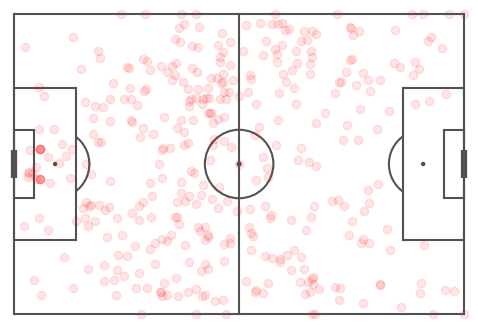

In [114]:
fig,ax = plt.subplots(figsize=(6,4)) 
plt.axis('off')
fig.patch.set_facecolor('white')

drawpitch(ax, hspan = [0, 120], vspan = [80,0],
            linecolor = '#232323', facecolor = '#e8e8e8', arcs = True, \
            lw = 1.5, x_offset = [1,1], y_offset = [-1,-1], style_id = 8,
            grass_cutting = False, measure='SBdata') 

plt.scatter(player_passes['location_x'],
            player_passes['location_y'],
            alpha=0.1,
            color = "red")